# Homework 5, problem 11.2

* How closely, as measured in the $L^2$ norm on the interval $[1,2]$, can the function $f(x)=x^{-1}$ be fitted by a linear combination of the function $e^x$, $\sin x$, and $\Gamma (x)$? ($\Gamma(x)$ is the gamma function, a built-in function in MATLAB). Write a program that determines the answer to at least two digits of relative accuracy using a discretization of $[1,2]$ and a discrete least squares problem. Write down youur estimate of the answer and also of the coefficients of the optimal linear combination, and produce a plot of the optimal approximation.
* Now repeat, but with $[1,2]$ replaced with $[0,1]$. You may find the following fact helpful: if $g(x) = 1/\Gamma(x),$ then $g'(0)=1$.

In [1]:
# import the required libraries
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import gamma

# set image parameters
plt.rcParams['figure.figsize'] = [16,8]
plt.rcParams['figure.dpi'] = 80

plt.rcParams['font.size'] = 15
plt.rcParams['legend.fontsize'] = 'large'
plt.rcParams['figure.titlesize'] = 'large'

In [2]:
def f(x):
    return(1/x)
nSteps = 3
x = np.linspace(1,2,nSteps)
A = np.array([np.exp(x),np.sin(x),gamma(x)]).T
b = f(x)

# Part 1: Approximaton over [1,2]

## Solve using Python's \ solver
This requires that the number of points used in the optimization equals degrees of freedom, which is 3 for this problem.

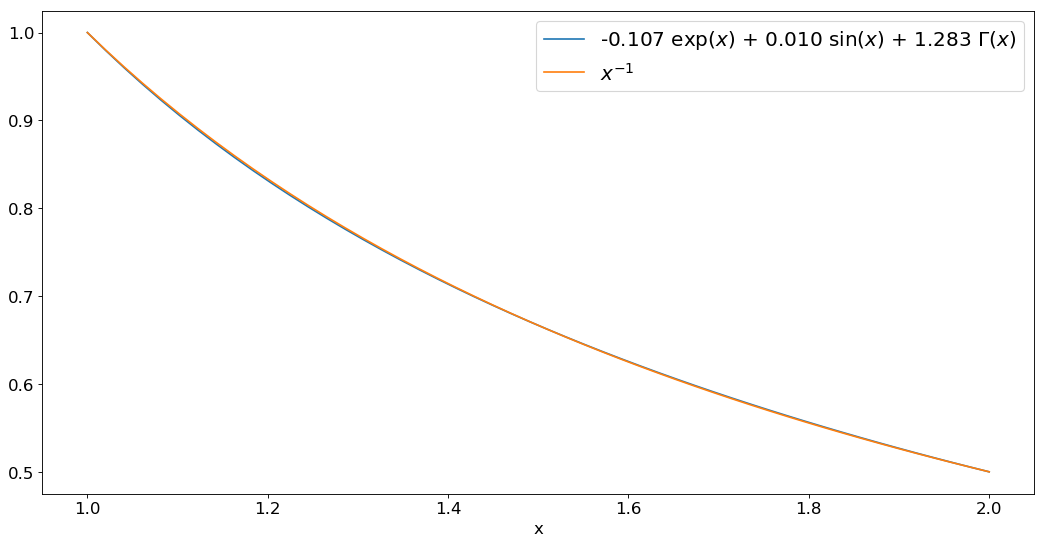

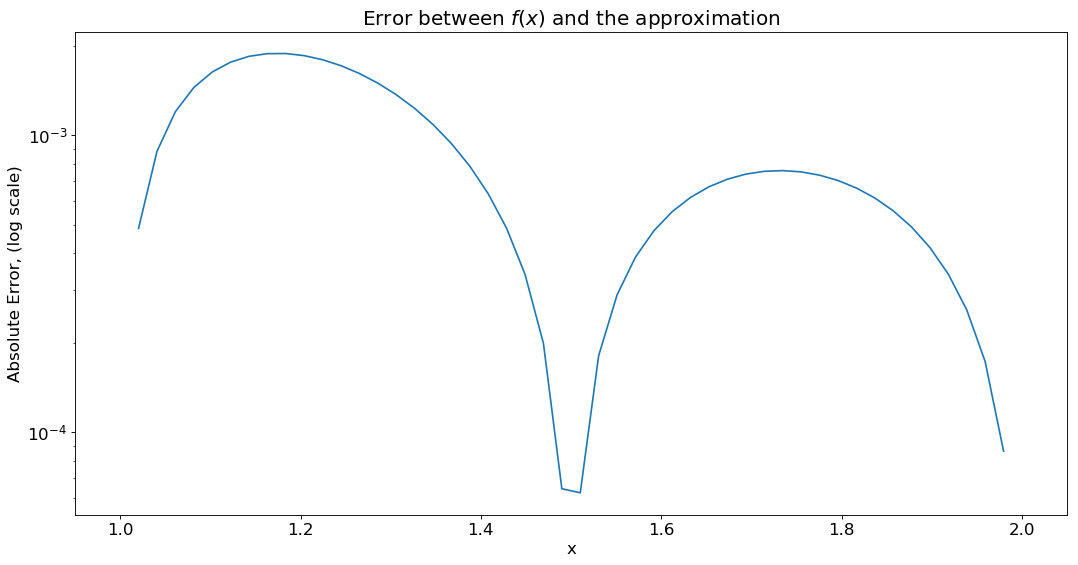

In [3]:
nSteps = 3
x = np.linspace(1,2,nSteps)
A = np.array([np.exp(x),np.sin(x),gamma(x)]).T
b = f(x)

coef = np.linalg.solve(A,b)
x = np.linspace(1,2,50)
B = np.array([np.exp(x),np.sin(x),gamma(x)]).T
plt.plot(x,B@coef,label='%.3f $\exp(x)$ + %.3f $\sin(x)$ + %.3f $\Gamma(x)$'%(coef[0],coef[1],coef[2]))
plt.plot(x,f(x), label='$x^{-1}$')
plt.legend()
plt.xlabel('x')
plt.show()

plt.plot(x,np.abs(B@coef-f(x)))
plt.title('Error between $f(x)$ and the approximation')
plt.ylabel('Absolute Error, (log scale)')
plt.yscale('log')
plt.xlabel('x')
plt.show()

## Solve using Householder QR factorization

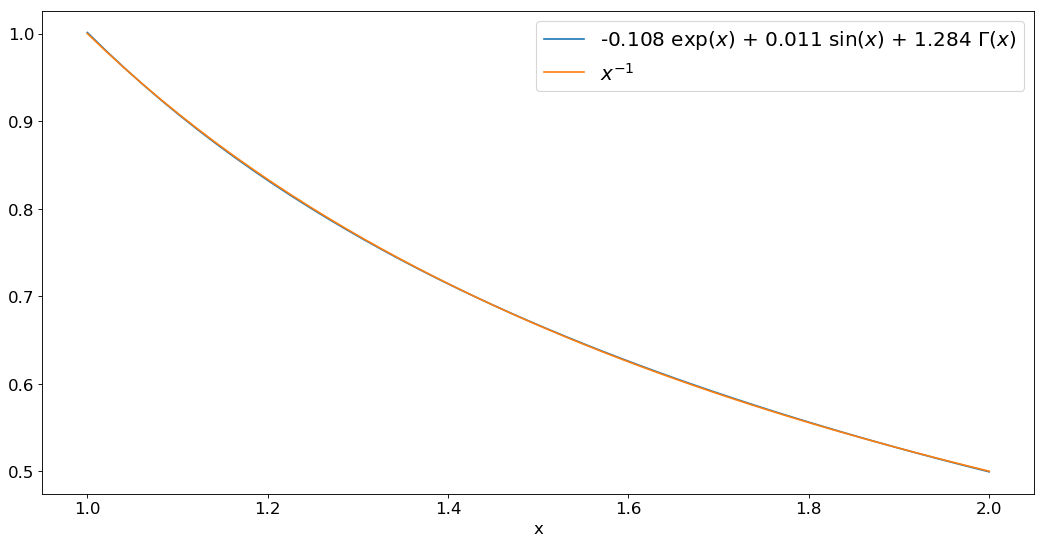

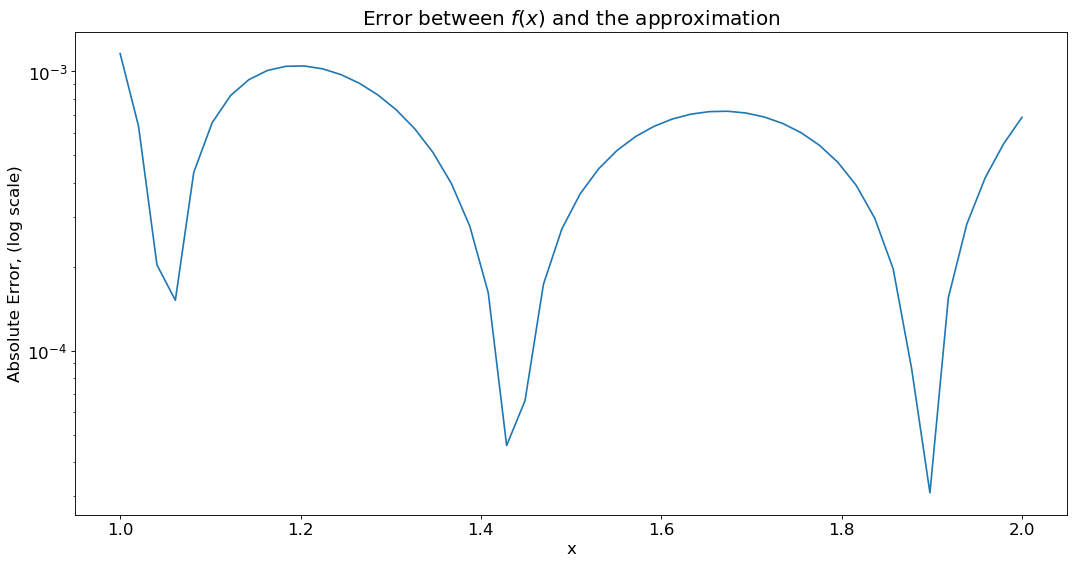

In [4]:
from Math_575a_functions import house, formQ, getH

nSteps = 10
x = np.linspace(1,2,nSteps)
A = np.array([np.exp(x),np.sin(x),gamma(x)]).T
b = f(x)

W,R = house(A)
Q = formQ(W)
Q_hat = Q[:,:3]
R_hat = R[:3,:3]

coef = np.linalg.solve(R_hat,getH(Q_hat)@b)

x = np.linspace(1,2,50)
B = np.array([np.exp(x),np.sin(x),gamma(x)]).T
plt.plot(x,B@coef,label='%.3f $\exp(x)$ + %.3f $\sin(x)$ + %.3f $\Gamma(x)$'%(coef[0],coef[1],coef[2]))
plt.plot(x,f(x), label='$x^{-1}$')
plt.legend()
plt.xlabel('x')
plt.show()

plt.plot(x,np.abs(B@coef-f(x)))
plt.title('Error between $f(x)$ and the approximation')
plt.ylabel('Absolute Error, (log scale)')
plt.yscale('log')
plt.xlabel('x')
plt.show()

# Part 2: Approximation over [0,1]

## Solve using Python's \ solver
This requires that the number of points used in the optimization equals degrees of freedom, which is 3 for this problem.

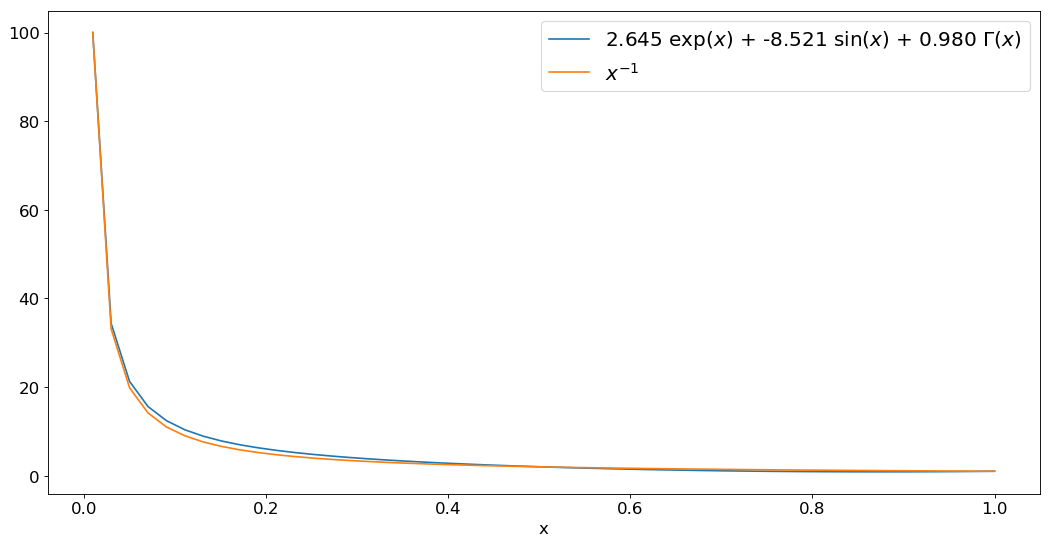

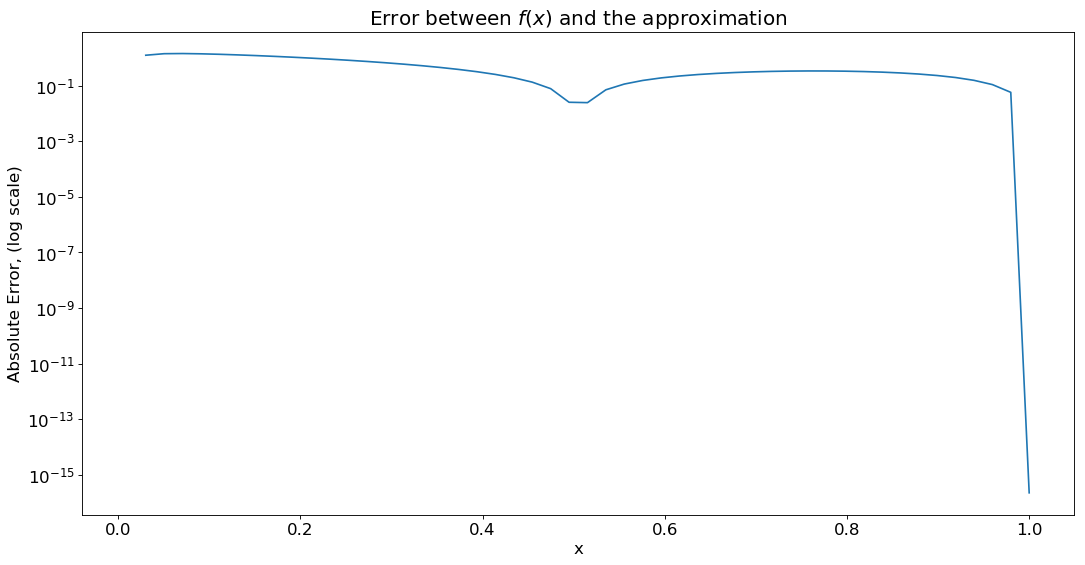

In [5]:
# Since f(x)=1/x is not defined at x=0,
# we solve the approximation over the interval [\epsilon , 1]
# for some small \epsilon > 0
epsilon = 1E-2

nSteps = 3
x = np.linspace(epsilon,1,nSteps)
A = np.array([np.exp(x),np.sin(x),gamma(x)]).T
b = f(x)

coef = np.linalg.solve(A,b)
x = np.linspace(epsilon,1,50)
B = np.array([np.exp(x),np.sin(x),gamma(x)]).T
plt.plot(x,B@coef,label='%.3f $\exp(x)$ + %.3f $\sin(x)$ + %.3f $\Gamma(x)$'%(coef[0],coef[1],coef[2]))
plt.plot(x,f(x), label='$x^{-1}$')
plt.legend()
plt.xlabel('x')
plt.show()

plt.plot(x,np.abs(B@coef-f(x)))
plt.title('Error between $f(x)$ and the approximation')
plt.ylabel('Absolute Error, (log scale)')
plt.yscale('log')
plt.xlabel('x')
plt.show()

## Solve using Householder QR factorization

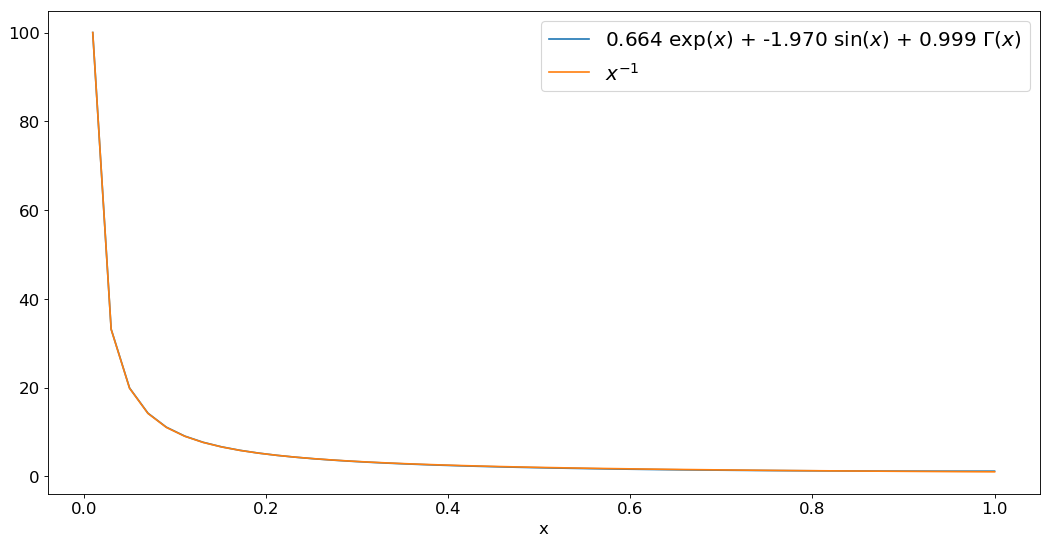

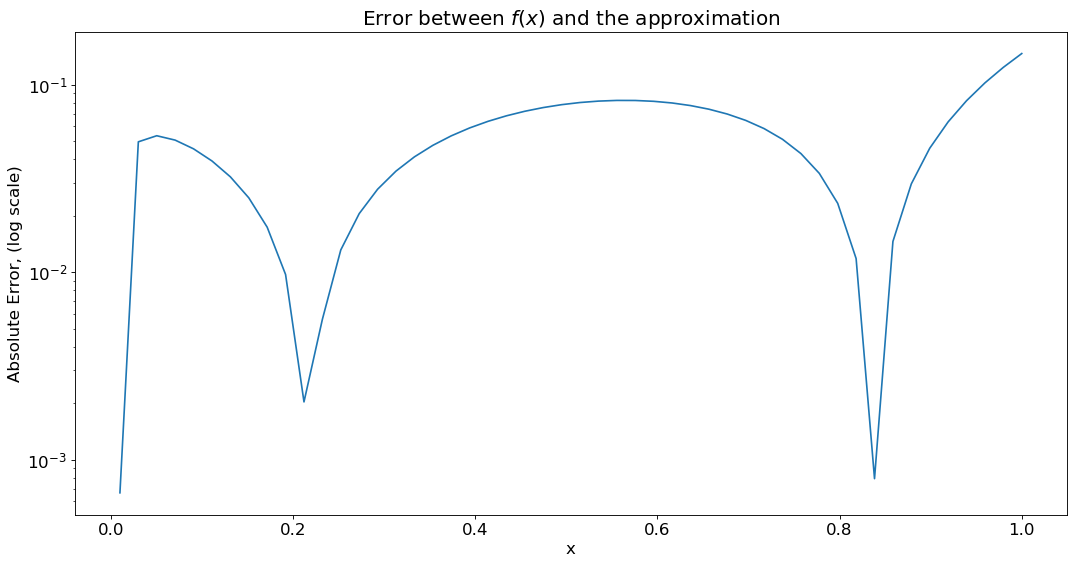

In [6]:
from Math_575a_functions import house, formQ, getH

nSteps = 10
x = np.linspace(epsilon,1,nSteps)
A = np.array([np.exp(x),np.sin(x),gamma(x)]).T
b = f(x)

W,R = house(A)
Q = formQ(W)
Q_hat = Q[:,:3]
R_hat = R[:3,:3]

coef = np.linalg.solve(R_hat,getH(Q_hat)@b)

x = np.linspace(epsilon,1,50)
B = np.array([np.exp(x),np.sin(x),gamma(x)]).T
plt.plot(x,B@coef,label='%.3f $\exp(x)$ + %.3f $\sin(x)$ + %.3f $\Gamma(x)$'%(coef[0],coef[1],coef[2]))
plt.plot(x,f(x), label='$x^{-1}$')
plt.legend()
plt.xlabel('x')
plt.show()

plt.plot(x,np.abs(B@coef-f(x)))
plt.title('Error between $f(x)$ and the approximation')
plt.ylabel('Absolute Error, (log scale)')
plt.yscale('log')
plt.xlabel('x')
plt.show()

## We now consider how the root mean square error between the truth and approximation changes as we vary $\epsilon >0$.

In [13]:
RMSE = []
pltX = []
for expo in range(-16,0):
    epsilon = 10**(expo)
    pltX.append(epsilon)
    nSteps = 100
    x = np.linspace(epsilon,1,nSteps)
    A = np.array([np.exp(x),np.sin(x),gamma(x)]).T
    b = f(x)

    W,R = house(A)
    Q = formQ(W)
    Q_hat = Q[:,:3]
    R_hat = R[:3,:3]

    coef = np.linalg.solve(R_hat,getH(Q_hat)@b)
    
    x = np.linspace(epsilon,1,50)
    B = np.array([np.exp(x),np.sin(x),gamma(x)]).T
    
    Approx_f = B@coef
    RMSE.append(np.mean((B@coef-f(x))**2)**0.5)

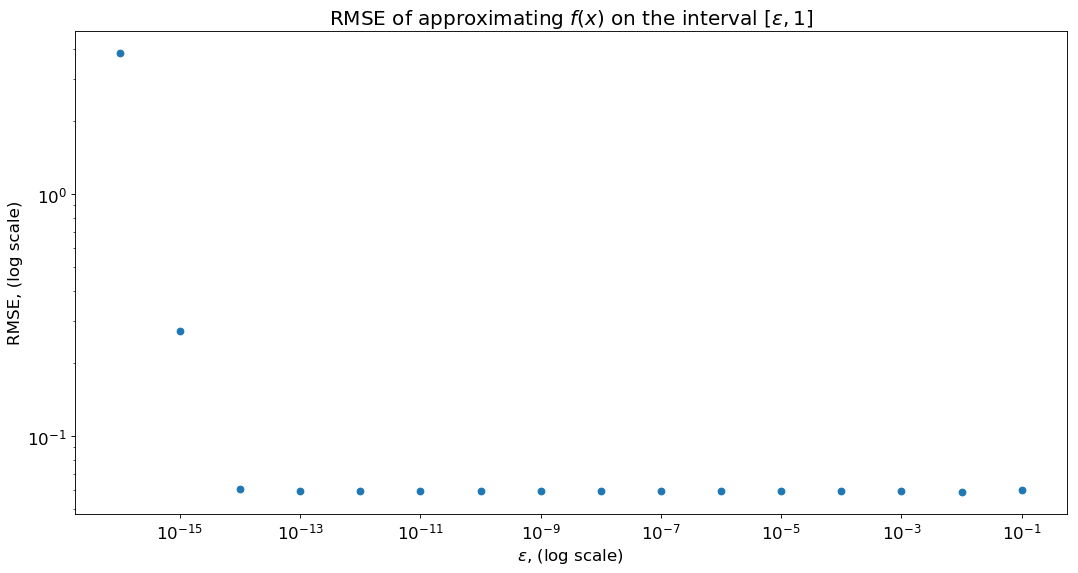

In [14]:
plt.plot(pltX,RMSE,'o')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('$\epsilon$, (log scale)')
plt.ylabel('RMSE, (log scale)')
plt.title('RMSE of approximating $f(x)$ on the interval $[\epsilon,1]$')
plt.show()